# import

In [1]:
import pandas as pd
import numpy as np

from google_play_scraper import reviews, Sort

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from konlpy.tag import Okt
from collections import Counter

from pprint import pprint

# 데이터 수집

## 구글 playstore 리뷰 데이터

In [2]:
def gstore_reviews(app_id):
    # 리뷰 가져오기
    result = reviews(
        app_id,
        lang='ko',  # 한국어 리뷰
        country='kr',  # 한국
        sort=Sort.NEWEST,  # 최신 리뷰 먼저 가져오기
        count=100000  # 가져올 리뷰 수 (최대 100000)
    )

    # 리뷰 데이터
    review_data = result[0]

    # DataFrame으로 변환
    return pd.DataFrame(review_data)

### 코딩밸리

In [3]:
cdv_df = gstore_reviews("inc.ulift.cv") 

In [4]:
print(cdv_df.shape)
cdv_df.head(2)

(71, 11)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,fa6bd9f2-f89f-4e2a-862f-1e2577daf5df,권유진,https://play-lh.googleusercontent.com/a/ACg8oc...,강의 내용이 이해가 쏙쏙 됩니다.,5,0,2.11.4,2025-01-04 22:37:52,"안녕하세요 회원님, 코딩밸리입니다.\n앞으로도 저희 코딩밸리 강의에 만족하실 수 있...",2025-01-06 11:42:16,2.11.4
1,c4b09f59-4fc8-4bac-b1bd-40e4ae1ab084,노백현,https://play-lh.googleusercontent.com/a/ACg8oc...,코딩입문으로는 이 앱이 정말 좋은거 같습니다. 다만 아쉬운 점이 있다면 파이썬이랑 ...,5,0,2.11.0,2024-12-22 02:10:06,"안녕하세요 회원님, 코딩밸리입니다.\n우선 귀한 시간 내어 소중한 의견 전달해주셔서...",2024-12-27 12:54:10,2.11.0


### Duolingo

In [5]:
duo_df = gstore_reviews("com.duolingo")

In [6]:
print(duo_df.shape)
duo_df.head(2)

(4500, 11)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,291762e4-d629-43d1-a653-5d1d33f154d7,Google 사용자,https://play-lh.googleusercontent.com/EGemoI2N...,너무 재밌고 공부도 잘 되는데 듀오링고 광고가 많이 나오는 것만 없으면 좋을 것 같아요,4,0,6.11.4,2025-01-07 20:59:32,None,None,6.11.4
1,73035dcb-9edf-4b7a-b1d0-56080f597a7c,Google 사용자,https://play-lh.googleusercontent.com/EGemoI2N...,이건 재밌고 초등학생들도 하면 재밌게 플레이 할꺼예요 별5개:),5,0,6.11.4,2025-01-07 20:59:02,None,None,6.11.4


### 뉴닉

In [7]:
nn_df = gstore_reviews("com.newneek.newneekapp")

In [8]:
print(nn_df.shape)
nn_df.head(2)

(331, 11)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d28a9387-a479-4583-8dc3-b01f2049b3d7,xv f,https://play-lh.googleusercontent.com/a-/ALV-U...,예전이랑 너무 많이 달라진 것 같네요 특히 1분 정도씩으로 요약해서 하루에 여러 기...,2,1,0.7.0,2025-01-05 18:47:37,None,NaT,0.7.0
1,de2996c8-482d-410f-bf4e-b39815d3ff13,Seunghwa Cho,https://play-lh.googleusercontent.com/a-/ALV-U...,글에 알맹이가 별로 없음,3,0,0.7.0,2025-01-04 23:22:42,None,NaT,0.7.0


# 데이터 분석

In [9]:
def get_WordCloud(df):
    stopwords = [
    '은', '는', '이', '가', '을', '를', '의', '에', '과', '도', '에서', '하다', '것',
    '다', '같다', '되다', '있다', '없다', '나', '너', '저', '우리', '그들', '그녀', '그것', '이것'
    ]

    # 형태소 분석기 초기화
    okt = Okt()

    # 텍스트 정제 및 형태소 분석
    cleaned_texts = []
    for text in df['content']:
        # 명사와 동사를 추출하여 불용어 리스트를 필터링
        words = okt.pos(text)  # 형태소 분석을 통해 품사 태깅
        cleaned_text = ' '.join([word for word, tag in words if (tag in ['Noun', 'Verb']) and word not in stopwords])
        cleaned_texts.append(cleaned_text)

    # 각 단어의 빈도수 계산
    word_counts = Counter()
    for text in cleaned_texts:
        word_counts.update(text.split())
        
    # 워드 클라우드 생성
    wordcloud = WordCloud(font_path="C:\\Windows\\Fonts\\malgun.ttf", width=800, height=400).generate_from_frequencies(word_counts)

    # 결과 출력
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    # plt.title('클래스101 리뷰 WORDCLOUD 예시', loc='left', fontsize=15)
    plt.axis('off')
    plt.show()

## 코딩밸리

### Word Cloud

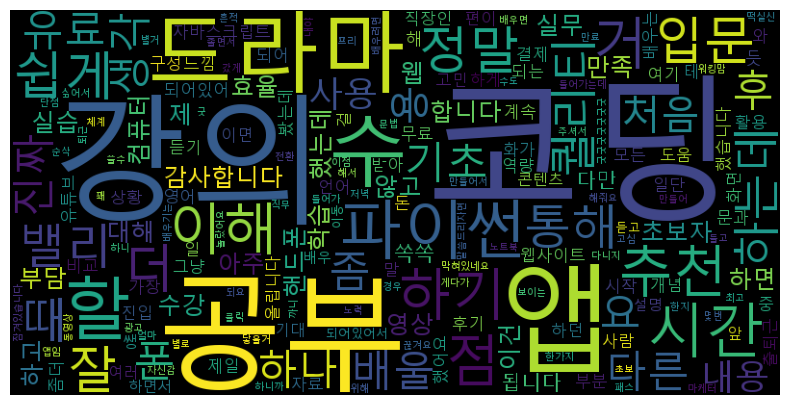

In [10]:
get_WordCloud(cdv_df)

## Duolingo

### Word Cloud

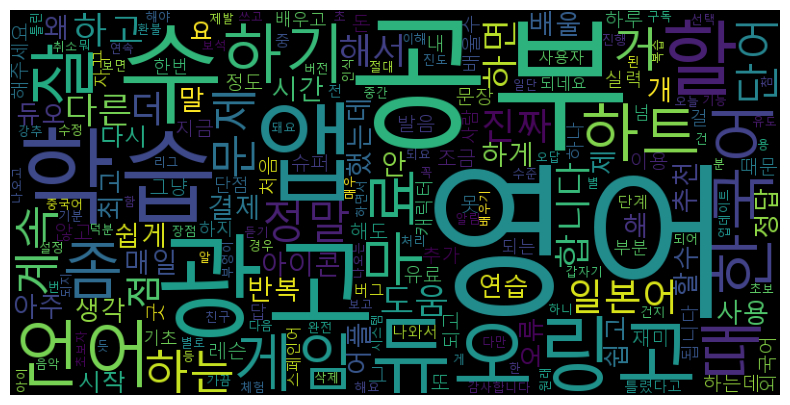

In [11]:
get_WordCloud(duo_df)

## 뉴닉

### Word Cloud

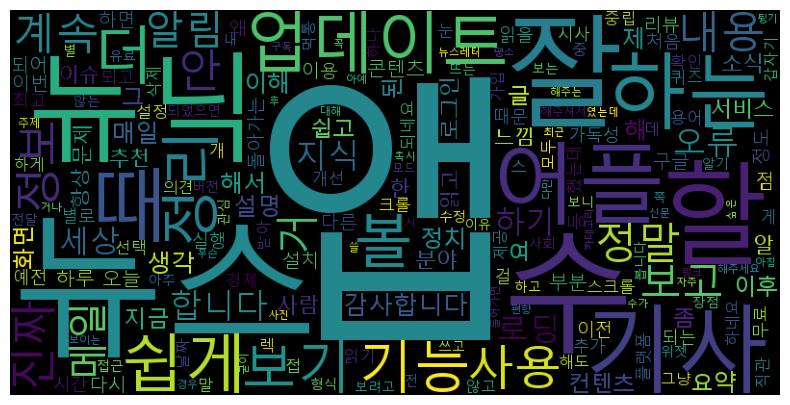

In [12]:
get_WordCloud(nn_df)